In [1]:
pip install yfinance

Using legacy 'setup.py install' for yfinance, since package 'wheel' is not installed.
Using legacy 'setup.py install' for multitasking, since package 'wheel' is not installed.
    Running setup.py install for multitasking: started
    Running setup.py install for multitasking: finished with status 'done'
    Running setup.py install for yfinance: started
    Running setup.py install for yfinance: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\naman\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline

In [4]:
stocks = input("Enter the code of the stock:- ")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

Enter the code of the stock:- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,7.349,7.540,7.283,7.483,27299
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675


In [5]:
data.shape

(3256, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3256 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3256 non-null   float64
 1   High    3256 non-null   float64
 2   Low     3256 non-null   float64
 3   Close   3256 non-null   float64
 4   Volume  3256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 152.6 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,3.710604,3.784235,3.632463,3.704380,131832.353808
std,1.827700,1.863149,1.787076,1.822525,54227.259508
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691000,2.735000,2.643000,2.692000,92091.250000
50%,3.251500,3.300500,3.178000,3.238000,127025.000000
75%,4.155250,4.240250,4.064250,4.151000,161796.000000
max,13.580000,13.694000,13.304000,13.505000,459196.000000


Text(0.5, 1.0, 'NG=F Price Series')

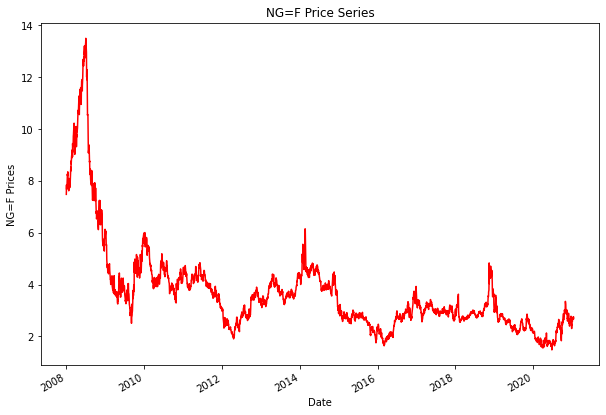

In [8]:
data.Close.plot(figsize=(10, 7), color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))

c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

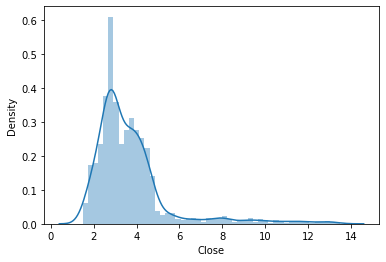

In [9]:
sns.distplot(data["Close"])

c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

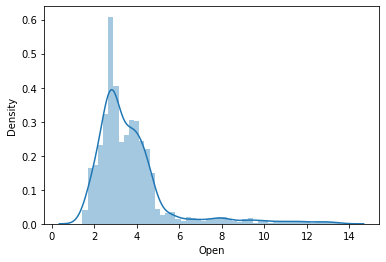

In [11]:
sns.distplot(data["Open"])

c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

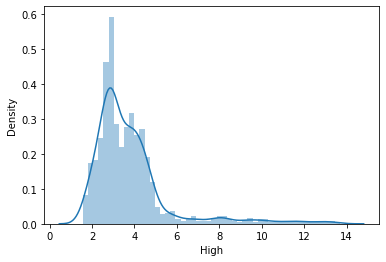

In [12]:
sns.distplot(data["High"])

In [16]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

X = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(2604, 4)
(652, 4)
(2604,)
(652,)


In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [18]:
pred1

array([ 2.90379654,  4.10693443,  2.82653372,  3.73693219,  3.93266347,
        3.79088622,  3.59035438,  1.72728096,  2.78063276,  4.53061106,
        2.1847237 ,  2.9458232 ,  4.43228442,  4.24585778,  3.31659025,
        4.83184829,  8.99854129,  3.73077567,  2.04211463,  2.81249668,
        3.09866515,  3.48109707,  2.77060226,  4.13375587,  2.93211063,
        3.91112244,  3.38011511,  4.62549892,  3.93561239,  3.61603312,
        2.8223151 ,  1.81620984,  2.7178312 , 11.49864709,  4.06371313,
        4.51740633,  2.68761357,  1.89132303,  2.96292218,  2.61028945,
        4.32567741,  2.97648968,  2.87597093,  3.12191485,  2.58927125,
        2.49327677,  2.5186038 ,  1.84619789,  4.653026  ,  2.61943693,
        2.91015977,  3.68345312,  2.32785375,  3.39158006,  2.95140413,
        3.69442777,  4.34712989,  2.98392268,  2.89075303, 12.78242168,
        5.72191527,  2.56798624,  4.93468344,  2.27837959, 13.21849088,
        4.18992567,  4.05428286,  7.74402844,  4.30800408,  2.36

In [19]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 

def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  0.0014286570866429691
RMSE:-  0.03779758043371254
R2_score:-  0.9995022528239916


In [21]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [22]:
calculate_metrics(y_test, la_p)

MSE:-  0.26629003535723217
RMSE:-  0.5160329789434317
R2_score:-  0.9072239837414766


In [24]:
calculate_metrics(y_test, ri_p)

MSE:-  0.0015451940592214224
RMSE:-  0.039308956475864666
R2_score:-  0.9994616510941966


In [25]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)   
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.092 total time=   1.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.057 total time=   1.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.061 total time=   1.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.077 total time=   1.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.045 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.092 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.057 total time=   1.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.061 total time=   1.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.078 total time=   1.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.044 total time=   1.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.092 total time=   1.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.003 total time=   1.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   1.9s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   2.1s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.006 total time=   1.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   1.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.006 total time=   1.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   1.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   1.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   1.2s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.019 total time=   1.8s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.023 total time=   1.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.024 total time=   1.2s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') # svm works best when there are lots of features. So here regularised linear regression works best
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test)

In [27]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")